In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

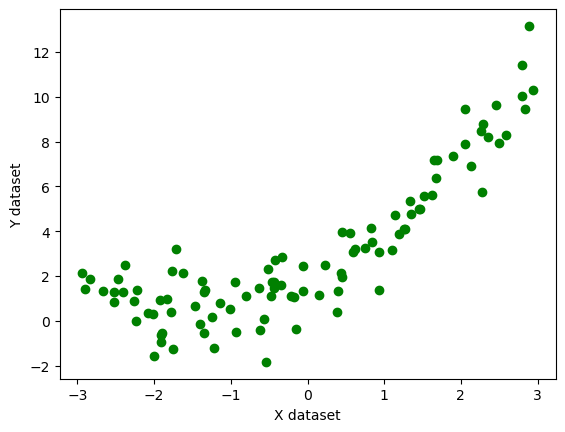

In [20]:
X=6*np.random.rand(100,1)-3
y=0.5*X**2 + 1.5*X + 2+ np.random.randn(100,1)

plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Let us first try simple linear regression on this
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

regression_1.fit(X_train,y_train)

from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(X_test))
print(score)


0.782944993783569


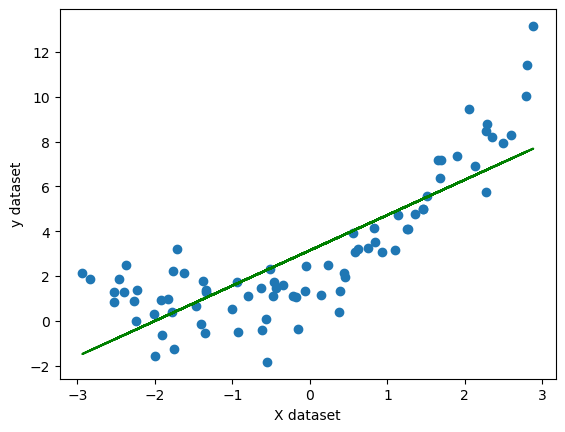

In [23]:
plt.plot(X_train,regression_1.predict(X_train),color='g')
plt.scatter(X_train,y_train)
plt.xlabel("X dataset")
plt.ylabel("y dataset")
plt.show()

In [24]:
#now let us increase the degree by applying polynomial transformation
# The line poly=PolynomialFeatures(degree=2, include_bias=True) creates an instance of the PolynomialFeatures class from the scikit-learn library. This tool is a pre-processing step used in machine learning to transform a dataset by creating new features.

# Its main purpose is to allow a linear model (like Linear Regression) to learn non-linear relationships in the data. It does this by creating polynomial combinations of the original features.
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)


print(X_train_poly)


[[ 1.00000000e+00 -6.15142271e-01  3.78400014e-01]
 [ 1.00000000e+00 -9.26803939e-01  8.58965540e-01]
 [ 1.00000000e+00 -6.53686745e-02  4.27306360e-03]
 [ 1.00000000e+00  7.52959359e-01  5.66947796e-01]
 [ 1.00000000e+00  1.65433498e+00  2.73682422e+00]
 [ 1.00000000e+00 -5.67040422e-01  3.21534841e-01]
 [ 1.00000000e+00  1.89869544e+00  3.60504436e+00]
 [ 1.00000000e+00 -1.50736043e-01  2.27213546e-02]
 [ 1.00000000e+00 -1.76539829e+00  3.11663113e+00]
 [ 1.00000000e+00 -5.47667377e-01  2.99939556e-01]
 [ 1.00000000e+00  1.51728202e+00  2.30214474e+00]
 [ 1.00000000e+00 -1.90891372e+00  3.64395161e+00]
 [ 1.00000000e+00  2.28169123e+00  5.20611489e+00]
 [ 1.00000000e+00 -2.53011143e+00  6.40146385e+00]
 [ 1.00000000e+00 -2.40340070e+00  5.77633492e+00]
 [ 1.00000000e+00 -2.26878757e+00  5.14739705e+00]
 [ 1.00000000e+00  2.79787755e+00  7.82811879e+00]
 [ 1.00000000e+00 -2.00064038e+00  4.00256194e+00]
 [ 1.00000000e+00 -2.22925361e+00  4.96957165e+00]
 [ 1.00000000e+00 -1.61891224e+

In [25]:

from sklearn.linear_model import LinearRegression
regression=LinearRegression()

regression.fit(X_train_poly,y_train)

from sklearn.metrics import r2_score
score=r2_score(y_test,regression.predict(X_test_poly))
print(score)

0.8921688629732687


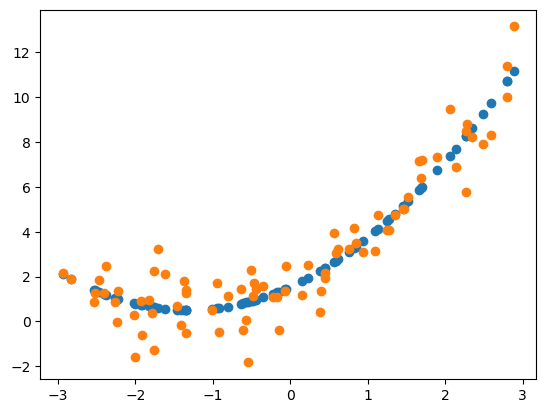

In [27]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)
plt.show()

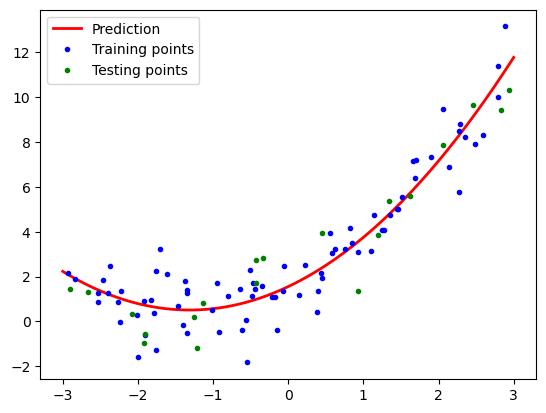

In [30]:
#Predictions on new data set
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)

y_new=regression.predict(X_new_poly)
plt.plot(X_new,y_new,"r-",linewidth=2,label="Prediction")
plt.plot(X_train,y_train,"b.",linewidth=2,label="Training points")
plt.plot(X_test,y_test,"g.",linewidth=2,label="Testing points")
plt.legend()
plt.show()
